In [ ]:
# Create a deep learning model to predict house prices. Some exploratory data analysis and feature engineering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


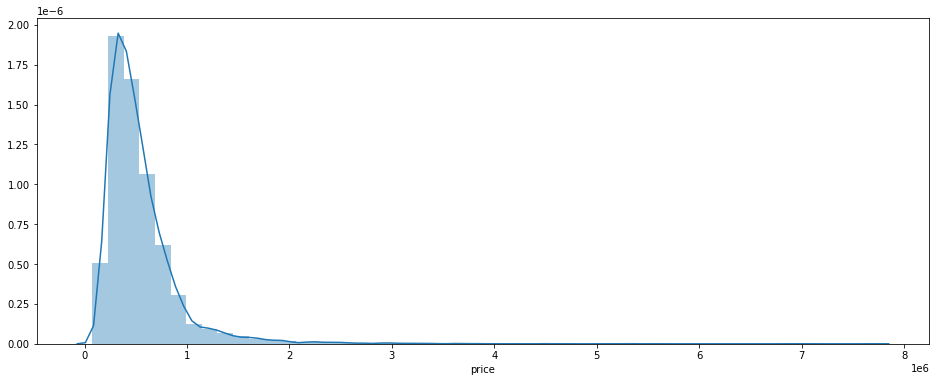

In [7]:
plt.figure(figsize=(16,6))
sns.distplot(df['price'])


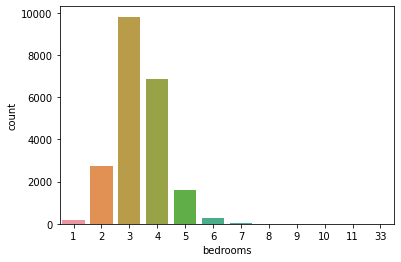

In [8]:
sns.countplot(df['bedrooms'])

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


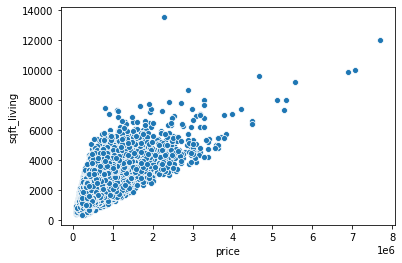

In [10]:
sns.scatterplot(x='price', y='sqft_living', data=df)

In [13]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [14]:
len(df)*0.01

215.97

In [15]:
non_top_1_percent = df.sort_values('price', ascending=False).iloc[216:]
#grabbing 99% of houses at the bottom in pricing

In [ ]:
# View the data using long and lat

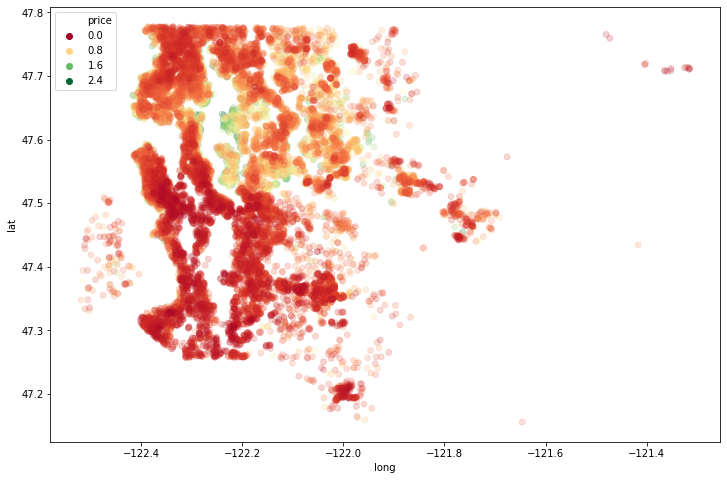

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data= non_top_1_percent, edgecolor=None, alpha=0.2, palette='RdYlGn', hue='price')

In [ ]:
# We see the edge of the water has the most expensive properties, this is because properties with a waterfront,
#tend to be more expensive

In [18]:
df = df.drop('id', axis=1)

In [19]:
# convert date column from string to a datetime object
df['date'] = pd.to_datetime(df['date'])

In [20]:
# This is feature engineering because the year and month was hidden inside the date | engineering more information
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

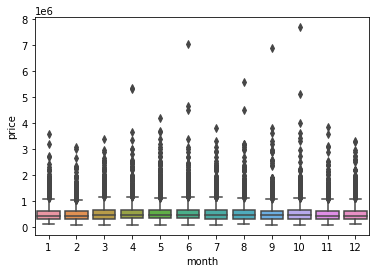

In [21]:
sns.boxplot(x='month', y='price', data=df)

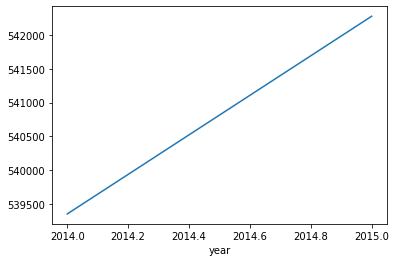

In [22]:
df.groupby('year').mean()['price'].plot()

In [ ]:
# Due to inflation the price increases every year

In [25]:
TRAIN THE MODEL

In [87]:
X = df.drop('price',axis=1)
y = df['price'].values

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [90]:
X_train = scaler.fit_transform(X_train)

In [91]:
X_test = scaler.transform(X_test)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [92]:
X_train.shape

(15117, 19)

In [93]:
X_test.shape

(6480, 19)

In [94]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [95]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test),batch_size=128,epochs=400)
                                                 #As we go along we check against out test set
                                                 

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430230994944.0000 - val_loss: 418857123840.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 428489179136.0000 - val_loss: 413066985472.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 406979018752.0000 - val_loss: 365968490496.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 314344308736.0000 - val_loss: 226227453952.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 160920403968.0000 - val_loss: 105468600320.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 101246017536.0000 - val_loss: 95057428480.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 97455775744.0000 - val_loss: 93510279168.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95742484480.0000 - val_loss: 91901853696.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 1ms/step - loss: 38144786432.0000 - val_loss: 36817289216.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 37922852864.0000 - val_loss: 36621049856.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 37726523392.0000 - val_loss: 36450156544.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 37525442560.0000 - val_loss: 36301012992.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 37342822400.0000 - val_loss: 36166447104.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 37205004288.0000 - val_loss: 35855679488.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 37007134720.0000 - val_loss: 35681918976.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 36875108352.0000 - val_loss: 35548991488.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 32790820864.0000 - val_loss: 31283128320.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 32809129984.0000 - val_loss: 31222808576.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 32744030208.0000 - val_loss: 31172055040.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 32776794112.0000 - val_loss: 31160565760.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 32698439680.0000 - val_loss: 31135899648.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32647426048.0000 - val_loss: 31109879808.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 32781434880.0000 - val_loss: 31102466048.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32581875712.0000 - val_loss: 31068977152.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 31382990848.0000 - val_loss: 29624862720.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31400787968.0000 - val_loss: 29621696512.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 31371919360.0000 - val_loss: 29614155776.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 31346116608.0000 - val_loss: 29595394048.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31324047360.0000 - val_loss: 29535987712.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 31284807680.0000 - val_loss: 29520091136.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 31302916096.0000 - val_loss: 29535246336.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31373764608.0000 - val_loss: 29567062016.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 30560497664.0000 - val_loss: 28561629184.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 30564483072.0000 - val_loss: 28523962368.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 30532464640.0000 - val_loss: 28530941952.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 30501740544.0000 - val_loss: 28518004736.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30504671232.0000 - val_loss: 28489695232.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30489530368.0000 - val_loss: 28601448448.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 30492624896.0000 - val_loss: 28473937920.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 30443448320.0000 - val_loss: 28457177088.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29746833408.0000 - val_loss: 27555450880.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 29794226176.0000 - val_loss: 27574081536.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 29742227456.0000 - val_loss: 27542669312.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 29701818368.0000 - val_loss: 27564699648.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 29692053504.0000 - val_loss: 27512119296.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29679966208.0000 - val_loss: 27493558272.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 29679335424.0000 - val_loss: 27581677568.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 29682786304.0000 - val_loss: 27480750080.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29079068672.0000 - val_loss: 26695145472.0000
Epoch 400/400
119/119 [==============================] - 1s 9ms/step - loss: 29024458752.0000 - val_loss: 26697316352.0000


In [96]:
# losses show the loss of the test data and the actual data
losses = pd.DataFrame(model.history.history)

In [97]:
losses

,loss,val_loss
0,4.302310e+11,4.188571e+11
1,4.284892e+11,4.130670e+11
2,4.069790e+11,3.659685e+11
3,3.143443e+11,2.262275e+11
4,1.609204e+11,1.054686e+11
...,...,...
395,2.912344e+10,2.681102e+10
396,2.915961e+10,2.671131e+10
397,2.906997e+10,2.680693e+10
398,2.907907e+10,2.669515e+10


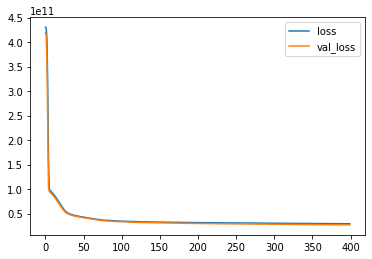

In [98]:
losses.plot()

In [ ]:
# There is over fitting on the data because the orange line is going further away from the blue line 

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [100]:
predictions = model.predict(X_test)

In [103]:
np.sqrt(mean_squared_error(y_test, predictions))

163393.13627270068

In [104]:
mean_absolute_error(y_test, predictions)
# average absolute error across all predictions. The mean price is $540296.66, therefore we around 19% off.

100902.8055459105

In [105]:
# how much variance is being explained by the model
explained_variance_score(y_test,predictions)

0.7988234489375491

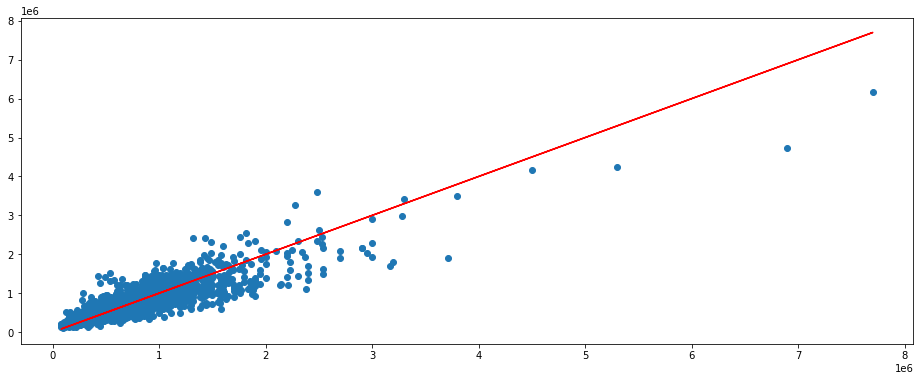

In [108]:
plt.figure(figsize=(16,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
'''
The expensive house we are not good at prediciting
We see we are good at predicitng prices between 0 - 2000000
'''

In [ ]:
Predictions

In [111]:
single_house = df.drop('price', axis=1).iloc[0]

In [112]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [113]:
model.predict(single_house)
# Trying to predict the price of the first entry in the df

array([[286090.75]], dtype=float32)

In [114]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [ ]:
# We can see we are over shooting, we could reduce our mse by removing the houses priced above 4000000.